# APPROACH TO SOLVE DATA SCIENCE PROJECT : Before commencing, let me delve into the approach

Three major statistical analytic steps to generate accurate and reliable forecast - 
1. Descriptive analytics (what happened?)
2. Diagnostic analytics (Why did it happen?)
3. Predictive analytics (What will happen?)

Basic analytical steps followed :-
1. Reading data from CSV file directly (as my datasets are present in local machine)

Descriptive analytics

2. Data Pre-processing
   - Data Cleaning 
      - Data profiling 
      - Handling missing values
      - Data purging (if needed)
      - Correcting data types
   - Data Transformation
      - Renaming columns
      - Creating new column 
      - Normalization
      - Encoding categorical data
   - Aggregation and grouping
   - Filter and slicing
   - Merging data
   - Splitting data
      - Splitting columns
      - Splitting rows
      - Splitting into Train and Test set
   - Saving processed data
3. Exploratory Data Analysis 
   - Visualize Data
   - Analyze key Metrics
      - Central tendency (mean, median, mode)
      - Variability (variance, standard deviation, range)
   - Feature Relationships
   - Identify Patterns
   - Trend Analysis & Grouping
   - Distribution Analysis

Diagnostic Analytics

4. Go Deeper
    - Identify anomalies & Outliers
    - Root Cause Analysis
5. Feature Engineering
   - Feature Selection
   - Feature Transformation
   - Feature Encoding
   - Feature Creation

Predictive Analytics

6. Splitting the Dataset
   - Train-Test Split
   - Cross- Validation
7. Model Selection
   - Regression for continuous targets (based on Data type for the current project)
   - LSTM for time series forecasting
8. Model Training
   - Fitting model to the training set
   - Tune hyperparameters using techniques like grid search or random search
9. Model Evaluation 
   - Time series: MAPE, RMSE, or Theil's U (evaluate on the test set or using cross-validation)
10. Model Tuning
   - Hyperparameter Tuning : Grid search, random search, or Bayesian optimization
   - Feature Importance : Drop irrelevant feature to improve performance
   - Ensemble Methods : Combine multiple models (e.g, bagging, boosting) to enhance predictions
11. Deployment
12. Interpretation and Reporting

# INTRODUCTION
PROJECT TITLE - NIFTY50 CLOSING PRICE PREDICTION 

ABOUT THE PROJECT - The project is all about uderstanding the past six years activities of NIFTY50 data in 1 day timeframe, cause of such activities and what would be the future price to get familiar with the price movement. The predicted value will be compared with the actual value later.

OBJECTIVE - To predict the future price movement of the Nifty50 index over a 30-day period and compare with the actual price value.

IMPORTANCE - The project importance lies on providing informed investment decisions, risk management, economic insights and business planning to target on maximum profit.

# PROBLEM STATEMENT: Nifty50 closing price prediction 
1. Who is effected? - As investors, traders, businesses, financial institutions, economics, and general public, are greatly influenced by the market performances (fluctuations or volatility) and so, the analysis can bring effective insights and decision-making capabilities.
2. What is happening? - The Nifty50 index fluctuation and volatility based on market conditions, investor sentiment, sectoral performance, and geopolitical events or changing interest rate.
3. When is this happening? - The fluctuation and volatility happens during market hours.
4. Where is this happening? - The problem is happening on the NSE, within financial markets globally, trading platform and exchanges, economic factors and investor sentiment.
5. Why is that a problem? - Fluctuations and volatility create a level of uncertainity and thus chances of loss risk increases.
6. What is the objective of the problem statement? - To predict the future price movement of the Nifty50 index over a 30-day period.

# DATA OVERVIEW
The dataset is pulled out from NSE website manually. This is a simple dataset with total records of 1488, which is ideal data frequency for daily data to predict next 10-30 days.This would be a small model (~1000 data points) with simple and well-preprocessed data. This minimum data will be modeled to compare the predicted price value with the actual value.

The key variables are - Date, Open, High, Low, Close, Shares Traded, and Turnover (Cr). The data is from the year 2019 untill 2024, has been imported and are all merged to perform the analysis.

# METHODOLOGY
TECHNIQUE USED - LONG SHORT-TERM MEMEORY (LSTM)
ABOUT LSTM - A type of Recurrent Neural Network (RNN), is a deep learning technique (subset of Machine Learning), designed to process sequential data and learn temporal patterns, making it highly effective for tasks like time-series prediction, natural language processing, and speech recognition.

Nifty50 is the benchmark stock market index of the National Stock Exchange of India (NSE). It represents the top 50 companies across various sectors. To forecast the closing price of Nifty50 index after 30 days starting from 31st December, 2024, requires a combination of time series forecasting techniques and machine learning models. As the dataset is modeled to capture short-term trends, seasonalities, and significant events, following approaches have been followed -

1. Importing necessary python libraries.
2. Loading CSV files of year 2019, 2020, 2021, 2022, 2023, and 2024.
3. All six dataset are merged together to analyse one dataset.
4. Data integration such as ETL, data pre-processing (data profiling, purging, cleaning).
5. Exploratory data analysis.
6. Extracting the closing price column and normalization.
7. Machine Learning: Using deep learning LSTM model with Walk-forward validation. As the dataset size is <5000, I have not chosen train-validation-test approach.
    - Defined a function to create a sequence for the model as LSTMs learn patterns over time by using sequences of past observartions to predict future values and it needs time-based windows (lookback sequences) as input.
    - Prepared dataset by splitting the data into training and test sets.
    - Built the model.
    - Applied walk-forward validation.
    - Calculated performance metrics
    - Retrained the model on full training dataset.
    - Generated predictions for next 30 days.  

# CONCLUSION
The output shows the difference between the predicted price and the market price on 10th of February, 2025 (1 day timeframe) is ₹1688.35 (23381.60 - 21693.25) which is 7.22% lack of prediction from the actual price. The model needs more optimization by adding more past data and fine tuning can show effective price prediction.  

In [32]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
%matplotlib inline

In [3]:
# loading the CSV file

data_2019 = pd.read_csv("D:/Data Science projects/NIFTY 50-01-01-2019-to-31-12-2019.csv")
data_2020 = pd.read_csv("D:/Data Science projects/NIFTY 50-01-01-2020-to-31-12-2020.csv")
data_2021 = pd.read_csv("D:/Data Science projects/NIFTY 50-01-01-2021-to-31-12-2021.csv")
data_2022 = pd.read_csv("D:/Data Science projects/NIFTY 50-01-01-2022-to-31-12-2022.csv")
data_2023 = pd.read_csv("D:/Data Science projects/NIFTY 50-01-01-2023-to-31-12-2023.csv")
data_2024 = pd.read_csv("D:/Data Science projects/NIFTY 50-01-01-2024-to-31-12-2024.csv")
#print(data_2024.head())

Descriptive Analysis

In [4]:
# data pre-processing
# combining all dataset into one dataframe

combined_data = pd.concat([data_2019, data_2020, data_2021, data_2022, data_2023, data_2024])
#print(combined_data.head())

# checking datatypes of each column in the combined dataset

print(combined_data.dtypes) 

# converting the 'date' column to datetime format

combined_data['Date '] = pd.to_datetime(combined_data['Date '])

# sorting the dataframe by the 'date' column in ascending order

combined_data = combined_data.sort_values(by='Date ', ascending=True)

# reset the index 

combined_data = combined_data.reset_index(drop=True)

# saving the combined and sorted dataset to a new CSV file

combined_data.to_csv('D:/Data Science projects/Financial_Analysis/Nifty50_LSTM/combined_sorted_data.csv',index=False)

print(combined_data.head())   # previewing the sorted dataset

Date                object
Open               float64
High               float64
Low                float64
Close              float64
Shares Traded      float64
Turnover (₹ Cr)    float64
dtype: object
       Date      Open      High       Low     Close   Shares Traded   \
0 2019-01-01  10881.70  10923.60  10807.10  10910.10     159404542.0   
1 2019-01-02  10868.85  10895.35  10735.05  10792.50     309665939.0   
2 2019-01-03  10796.80  10814.05  10661.25  10672.25     286241745.0   
3 2019-01-04  10699.70  10741.05  10628.65  10727.35     296596655.0   
4 2019-01-07  10804.85  10835.95  10750.15  10771.80     269371080.0   

   Turnover (₹ Cr)  
0          8688.26  
1         15352.25  
2         15030.45  
3         14516.74  
4         12731.29  


In [5]:
# data profiling and generating profile report

from ydata_profiling import ProfileReport

profile = ProfileReport(combined_data, title="Data Profiling Report")

# save the report

profile.to_file('D:/Data Science projects/Financial_Analysis/Nifty50_LSTM/profile_report.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# check for missing values

print(combined_data.isnull().sum())

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      1
Turnover (₹ Cr)    1
dtype: int64


In [7]:
# print columns

print(combined_data.columns)

Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ',
       'Turnover (₹ Cr)'],
      dtype='object')


In [8]:
# drop columns having null values and not necessary for further analysis - data purging (deleting columns permanently)

cols = ['Shares Traded ', 'Turnover (₹ Cr)']

combined_data_cleaned = combined_data.drop(columns=cols)

print(combined_data_cleaned.head())

       Date      Open      High       Low     Close 
0 2019-01-01  10881.70  10923.60  10807.10  10910.10
1 2019-01-02  10868.85  10895.35  10735.05  10792.50
2 2019-01-03  10796.80  10814.05  10661.25  10672.25
3 2019-01-04  10699.70  10741.05  10628.65  10727.35
4 2019-01-07  10804.85  10835.95  10750.15  10771.80


In [9]:
# reviewing any null values, data types and statistical summary of the cleaned and merged dataset

print(combined_data_cleaned.isnull().sum())

print(combined_data_cleaned.dtypes)

print(combined_data_cleaned.describe())

print(combined_data_cleaned.shape)      # dimension of the dataset

Date      0
Open      0
High      0
Low       0
Close     0
dtype: int64
Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
dtype: object
              Open          High           Low         Close 
count   1488.000000   1488.000000   1488.000000   1488.000000
mean   16383.192675  16460.884005  16277.977554  16371.834610
std     4417.828188   4426.025353   4409.610244   4418.340055
min     7735.150000   8036.950000   7511.100000   7610.250000
25%    11922.562500  11968.437500  11841.825000  11912.662500
50%    16942.625000  17078.800000  16826.525000  16952.825000
75%    19033.787500  19081.125000  18929.987500  19003.675000
max    26248.250000  26277.350000  26151.400000  26216.050000
(1488, 5)


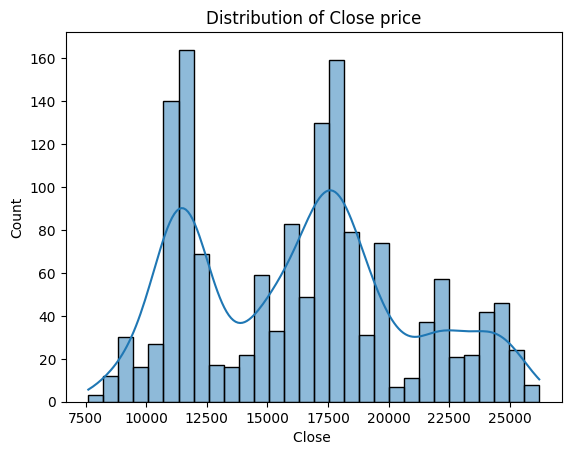

In [33]:
# distribution of Close Price

sns.histplot(combined_data_cleaned['Close '], kde=True, bins=30)

plt.title("Distribution of Close price")

plt.show()

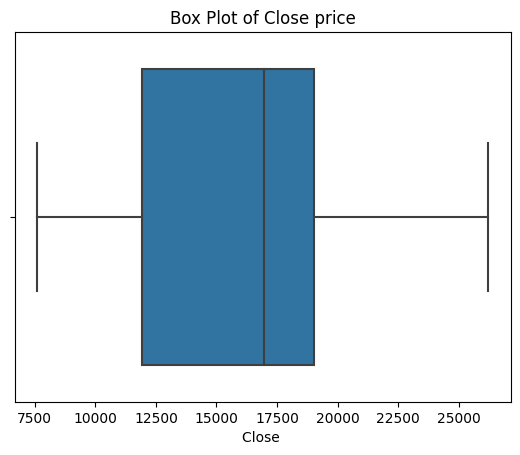

In [34]:
# box plot for outliers & spread

sns.boxplot(x=combined_data_cleaned['Close '])

plt.title("Box Plot of Close price")

plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11920\3167434619.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_data_cleaned.corr()


           Open      High       Low     Close 
Open    1.000000  0.999824  0.999722  0.999549
High    0.999824  1.000000  0.999655  0.999779
Low     0.999722  0.999655  1.000000  0.999793
Close   0.999549  0.999779  0.999793  1.000000


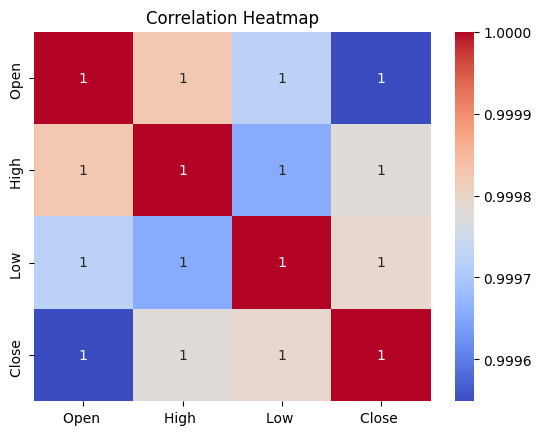

In [35]:
# correlation analysis

correlation_matrix = combined_data_cleaned.corr()

print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap")

plt.show()

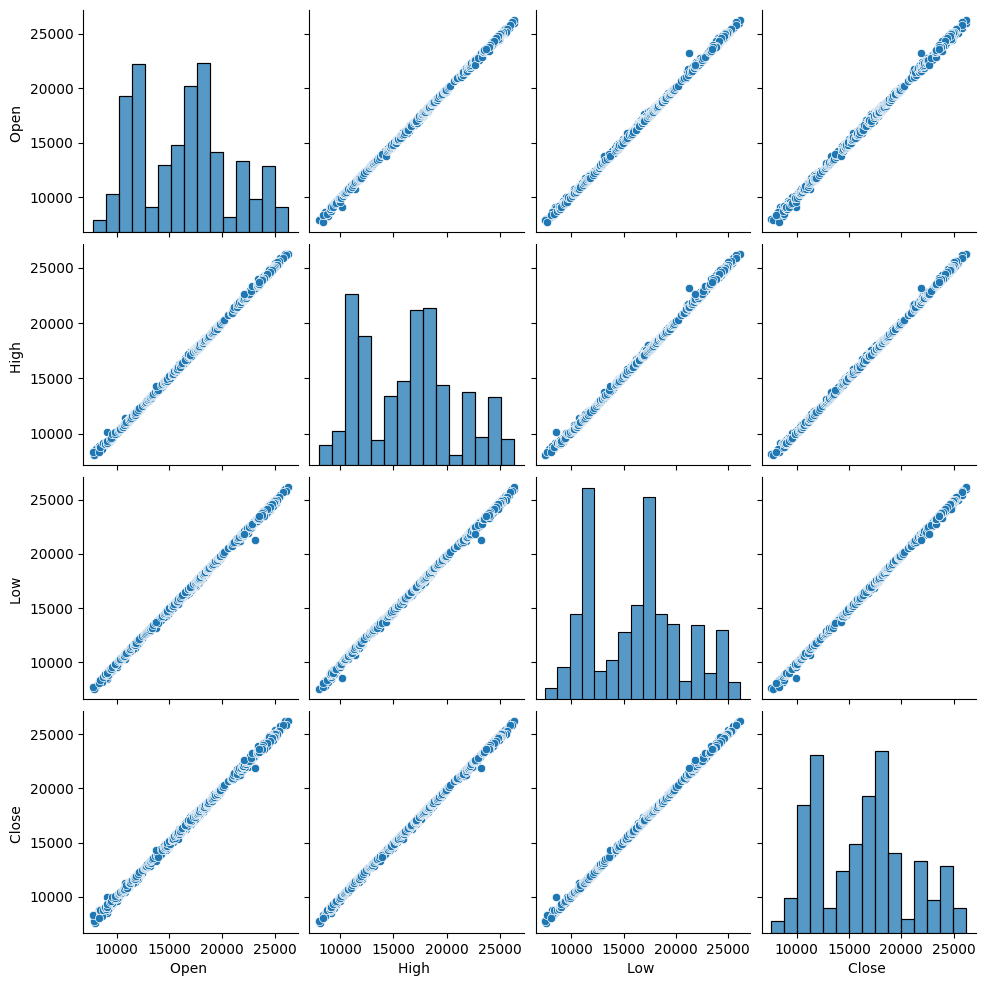

In [36]:
# pairwise relationships

sns.pairplot(combined_data_cleaned)

plt.show()

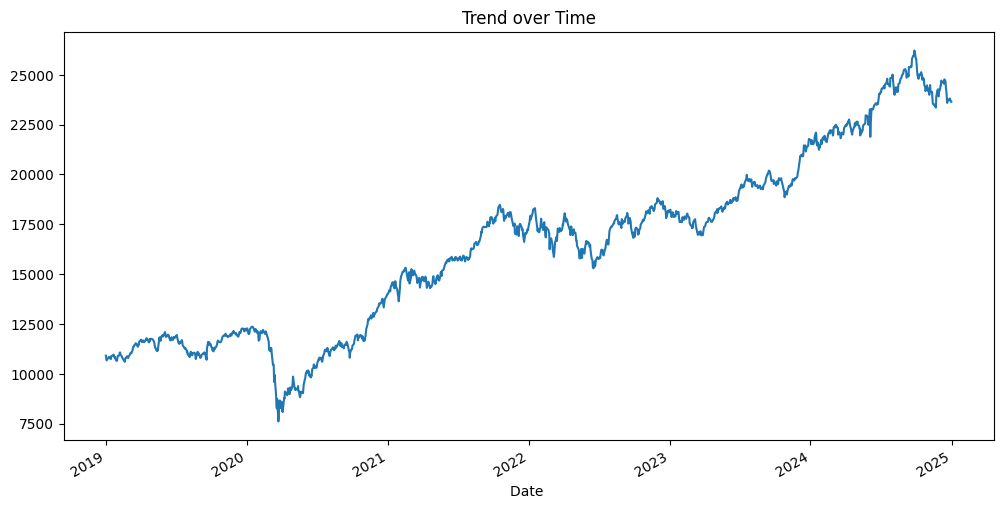

In [37]:
# time series trend analysis

combined_data_cleaned.set_index('Date ', inplace=True)

combined_data_cleaned['Close '].plot(figsize=(12,6), title="Trend over Time")

plt.show()

In [11]:
# extracting the 'Close' column

closing_prices = combined_data_cleaned['Close '].values.reshape(-1, 1)

# Scaling the data using Normalization

scaler = MinMaxScaler(feature_range=(0, 1))

Scaled_data = scaler.fit_transform(closing_prices)

In [12]:
# praparing dataset by splitting the data into training and test sets. First defining a function to create sequence for the LSTM model.

def create_sequences(combined_data_cleaned, time_step=60):
    X, y = [], []
    for i in range(len(combined_data_cleaned) - time_step - 1):
        X.append(combined_data_cleaned[i:(i + time_step), 0])
        y.append(combined_data_cleaned[i + time_step, 0])
    return np.array(X), np.array(y)

# set the time step

time_step = 60

# splitting data into training and testing sets

training_size = int(len(Scaled_data) * 0.8)

train_data = Scaled_data[:training_size]

test_data = Scaled_data[training_size - time_step:]

# creating sequences

X_train, y_train = create_sequences(train_data, time_step)

X_test, y_test = create_sequences(test_data, time_step)

# reshape for LSTM input

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [13]:
# building the LSTM model

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

model.add(LSTM(50, return_sequences=False))

model.add(Dense(25))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

As the size of dataset is <5000, without choosing train-validation-test approach after compiling the model, walk-forward validation is chosen.

In [15]:
# applying walk-forward validation. First initialize lists for metrics (to store prediction errors)

errors = []

predictions = []

actuals = []

for i in range(len(X_test)):                                 # iterating over test set
    X_train_fold = np.vstack((X_train, X_test[:i]))          # expanding training set with new observations
    y_train_fold = np.concatenate((y_train, y_test[:i]))

    # retrain the model on the updated dataset

    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

    # predict next time step

    y_pred = model.predict(X_test[i].reshape(1, time_step, 1))

    # store results

    predictions.append(y_pred[0][0])

    actuals.append(y_test[i])

    # compute and store error

    error = mean_squared_error([y_test[i]], y_pred)

    errors.append(error)

# claculate average error

avg_mse = np.mean(errors)

print(f'Average MSE during Walk-Forward Validation: {avg_mse}')

1/1 [==============================] - 0s 46ms/step
Average MSE during Walk-Forward Validation: 0.00015408032632374053


In [17]:
# calculating additional performance metrics by converting lists to numpy arrays

predictions = np.array(predictions)

actuals = np.array(actuals)

# computing evaluation metrics

mse = mean_squared_error(actuals, predictions)

mae = mean_absolute_error(actuals, predictions)

rmse = np.sqrt(mse)

print(f'Mean Absolute Error, MAE: {mae}')

print(f'Mean Squared Error, MSE: {mse}')

print(f'Root Mean Absolute Error, RMSE: {rmse}')

Mean Absolute Error, MAE: 0.009274208426406564
Mean Squared Error, MSE: 0.00015408032632374053
Root Mean Absolute Error, RMSE: 0.012412909663883828


In [18]:
# retrain model on full training dataset

model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
36/36 [==============================] - 10s 161ms/step - loss: 5.9221e-05
Epoch 2/50
36/36 [==============================] - 3s 94ms/step - loss: 5.4295e-05
Epoch 3/50
36/36 [==============================] - 3s 75ms/step - loss: 6.1033e-05
Epoch 4/50
36/36 [==============================] - 3s 78ms/step - loss: 5.4180e-05
Epoch 5/50
36/36 [==============================] - 3s 79ms/step - loss: 5.4670e-05
Epoch 6/50
36/36 [==============================] - 3s 73ms/step - loss: 5.5450e-05
Epoch 7/50
36/36 [==============================] - 3s 80ms/step - loss: 5.3700e-05
Epoch 8/50
36/36 [==============================] - 3s 75ms/step - loss: 5.4216e-05
Epoch 9/50
36/36 [==============================] - 3s 77ms/step - loss: 5.5182e-05
Epoch 10/50
36/36 [==============================] - 3s 76ms/step - loss: 5.7812e-05
Epoch 11/50
36/36 [==============================] - 3s 73ms/step - loss: 6.2850e-05
Epoch 12/50
36/36 [==============================] - 2s 68ms/step - loss

In [19]:
# select last 'time_step' days feom test set as input for future predictions

last_60_days = Scaled_data[-time_step:]            # ensuring proper shape

# reshaping input data

last_60_days = last_60_days.reshape(1, time_step, 1)

In [23]:
# generating predictions for next 30 days

future_predictions = []

current_input = last_60_days.copy()

# predict next 30 days

for i in range(30):
    next_pred = model.predict(current_input)        # shape: (1, 1)
    future_predictions.append(next_pred[0][0])      # store prediction

    # correcting the shape before appending

    next_pred_reshaped = np.reshape(next_pred, (1, 1, 1))          # convert to (1, 1, 1)

    # updata input with new prediction, remove the oldest value

    current_input = np.append(current_input[:, 1:, :], next_pred_reshaped, axis=1)

# convert predictions back to original scale (inverse transform)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

print("Predicted Closing Prices for Next 30 Days:")

print(future_predictions)

1/1 [==============================] - 0s 104ms/step
Predicted Closing Prices for Next 30 Days:
[[23639.49 ]
 [23614.129]
 [23576.32 ]
 [23534.271]
 [23481.557]
 [23414.38 ]
 [23332.46 ]
 [23232.668]
 [23102.557]
 [22940.426]
 [22757.334]
 [22575.156]
 [22392.209]
 [22191.496]
 [21965.541]
 [21721.861]
 [21487.707]
 [21304.096]
 [21194.78 ]
 [21147.604]
 [21149.703]
 [21196.375]
 [21279.62 ]
 [21382.947]
 [21487.229]
 [21585.86 ]
 [21669.076]
 [21716.2  ]
 [21721.414]
 [21693.256]]


In [24]:
# get the last date from combined_data_cleaned

last_date = combined_data_cleaned['Date '].iloc[-1]

print("Last available date in dataset:", last_date)

Last available date in dataset: 2024-12-31 00:00:00


In [26]:
# generating next 30 business days

future_dates = pd.date_range(start=last_date, periods=30, freq='B')        # 'B' ensures only business days

In [28]:
# convert predictions into a DataFrame

predictions_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_predictions.flatten()})

# display the first few and last few rows

print(predictions_df.head(15))

print(predictions_df.tail(15))

         Date  Predicted_Close
0  2024-12-31     23639.490234
1  2025-01-01     23614.128906
2  2025-01-02     23576.320312
3  2025-01-03     23534.271484
4  2025-01-06     23481.556641
5  2025-01-07     23414.380859
6  2025-01-08     23332.460938
7  2025-01-09     23232.667969
8  2025-01-10     23102.556641
9  2025-01-13     22940.425781
10 2025-01-14     22757.333984
11 2025-01-15     22575.156250
12 2025-01-16     22392.208984
13 2025-01-17     22191.496094
14 2025-01-20     21965.541016
         Date  Predicted_Close
15 2025-01-21     21721.861328
16 2025-01-22     21487.707031
17 2025-01-23     21304.095703
18 2025-01-24     21194.779297
19 2025-01-27     21147.603516
20 2025-01-28     21149.703125
21 2025-01-29     21196.375000
22 2025-01-30     21279.619141
23 2025-01-31     21382.947266
24 2025-02-03     21487.228516
25 2025-02-04     21585.859375
26 2025-02-05     21669.076172
27 2025-02-06     21716.199219
28 2025-02-07     21721.414062
29 2025-02-10     21693.255859
